# Handwritten Digit Detection
#### Helia Rasooli
#### Zahra Bakhtiar
#### Bahareh Behroozi
#### Seyyedeh Zahra Fallah MirMousavi Ajdad

# MNIST
#### The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST.
##### http://yann.lecun.com/exdb/mnist/

In [1]:
import warnings
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import ndimage
#import itertools


warnings.filterwarnings("ignore")

def calculateDigitsAccuracy(predicted, actual):
    correct = 0
    for i in range(len(predicted)):
        if predicted[i] == actual[i][0]:
            correct += 1

    return correct / len(actual)

def calculateLettersAccuracy(predicted, actual):
    correct = 0
    for i in range(len(predicted)):
        if predicted[i] == actual[i]:
            correct += 1

    return correct / len(actual)

def showImage(data):
    plt.imshow(np.reshape(data, (28, 28)), cmap='gray_r')
    plt.show()
    
def showImage_L(data):
    rotated_img = ndimage.rotate(np.reshape(data, (28, 28)), 90)
    plt.imshow(rotated_img, cmap='gray_r',origin='lower')
    plt.show()

    
def showPlot(points, xLabel, yLabel):
    X = [x for (x, y) in points]
    Y = [y for (x, y) in points]

    plt.plot(X, Y)
    plt.ylabel(yLabel)
    plt.xlabel(xLabel)
    plt.show()
    
def compareScores(X, trainScores, testScores, xlabel, ylabel):
    fig, ax = plt.subplots()
    for scores, label, style in [(trainScores, 'Train Data', ':ob'), (testScores, 'Test Data', ':or')]:
        ax.plot(X, scores, style, label=label)
        best_xy = max([(n, score) for n, score in zip(X, scores)], key=lambda x: x[1])
        ax.annotate((best_xy[0], round(best_xy[1], 3)), xy=best_xy, xytext=(best_xy[0] + 5, best_xy[1]), arrowprops=dict(arrowstyle="->"))
    ax.legend()
    ax.set(xlabel=xlabel, ylabel=ylabel)
    fig.show()

trainData = pd.read_csv('./MNIST_data/train_data.csv', header=None).values
trainLabels = pd.read_csv('./MNIST_data/train_label.csv', header=None).values

testData = pd.read_csv('./MNIST_data/test_data.csv', header=None).values
testLabels = pd.read_csv('./MNIST_data/test_label.csv', header=None).values


an example of number 6 in dataset :

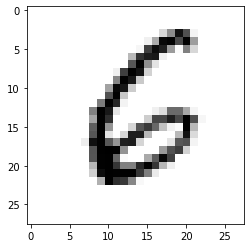

In [2]:
showImage(trainData[1310])

# K-Nearest Neighbors 

#### 1.

 In KNN algorithm the output of each test depends on the k closest training examples in the feature space.
  * In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighborsa (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
  * In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.



#### 2.

In [3]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=12)
clf.fit(trainData, trainLabels)

predictedTrain = clf.predict(trainData)
predictedTest = clf.predict(testData)

trainAcc = calculateDigitsAccuracy(predictedTrain, trainLabels)
testAcc = calculateDigitsAccuracy(predictedTest, testLabels)

print('train data accuracy:', trainAcc)
print('test data accuracy:', testAcc)

train data accuracy: 0.9145
test data accuracy: 0.91


#### 3.

In [4]:
trainScores = []
testScores = []

X = [x for x in range(5, 15)]

for k in X:
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(trainData, trainLabels)

    predictedTrain = clf.predict(trainData)
    predictedTest = clf.predict(testData)

    trainAcc = calculateDigitsAccuracy(predictedTrain, trainLabels)
    testAcc = calculateDigitsAccuracy(predictedTest, testLabels)

    trainScores.append(trainAcc)
    testScores.append(testAcc)

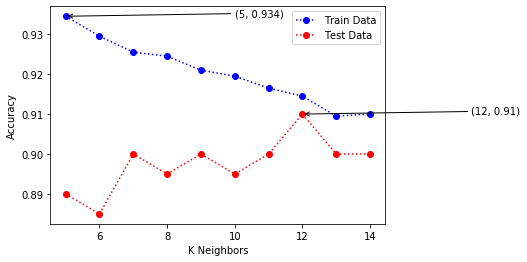

In [5]:
compareScores(X, trainScores, testScores, 'K Neighbors', 'Accuracy')

[[1042 1012 1010 1008 1035 1143 1160 1045 1084 1091 1126 1157 1082 1135
  1112 1174 1113 1004 1032 1129]]


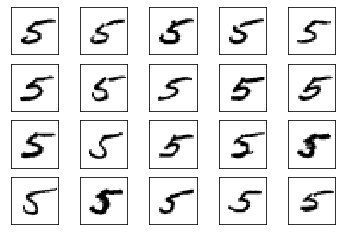

In [6]:
clf = neighbors.KNeighborsClassifier(n_neighbors=20)
clf.fit(trainData, trainLabels)
nearests = clf.kneighbors([trainData[1042]], return_distance=False)
print(nearests)
fig, ax = plt.subplots(4, 5, subplot_kw=dict(xticks=[], yticks=[]))
for (i, axi) in enumerate(ax.flat):
    axi.imshow(np.reshape(trainData[nearests[0][i]], (28, 28)), cmap='gray_r')

#### 6.

* doesn't work well with high dimensional data
* doesn't work well with categorical features
* Heavy calculation and memory

# Decision Tree

#### 7.

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

In [7]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=22)
clf.fit(trainData, trainLabels)

predictedTrain = clf.predict(trainData)
predictedTest = clf.predict(testData)

trainAcc = calculateDigitsAccuracy(predictedTrain, trainLabels)
testAcc = calculateDigitsAccuracy(predictedTest, testLabels)

print('train data accuracy:', trainAcc)
print('test data accuracy:', testAcc)

train data accuracy: 1.0
test data accuracy: 0.725


#### 9.

In [8]:
trainScores = []
testScores = []

X = range(5, 30)

for depth in X:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(trainData, trainLabels)

    predictedTrain = clf.predict(trainData)
    predictedTest = clf.predict(testData)

    trainAcc = calculateDigitsAccuracy(predictedTrain, trainLabels)
    testAcc = calculateDigitsAccuracy(predictedTest, testLabels)

    trainScores.append(trainAcc)
    testScores.append(testAcc)

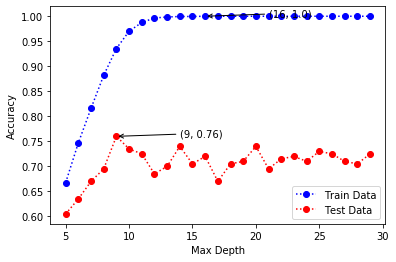

In [9]:
compareScores(X, trainScores, testScores, 'Max Depth', 'Accuracy')

## Logistic Regression

#### 10.

Logistic Regression is used when the dependent variable(target) is categorical. It uses sigmod hypothesis function (1 / 1 + e^2) for prediction.

Types of logistic regression:

* Binary Logistic Regression: The categorical response has only two 2 possible outcomes. Example: Spam or Not
* Multinomial Logistic Regression: Three or more categories without ordering. Example: Predicting which food is preferred more (Veg, Non-Veg, Vegan)
* Ordinal Logistic Regression: Three or more categories with ordering. Example: Movie rating from 1 to 5

#### 11.

In [10]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs')
clf.fit(trainData, trainLabels)

predictedTrain = clf.predict(trainData)
predictedTest = clf.predict(testData)

trainAcc = calculateDigitsAccuracy(predictedTrain, trainLabels)
testAcc = calculateDigitsAccuracy(predictedTest, testLabels)

In [11]:
print('train data accuracy:', trainAcc) 
print('test data accuracy:', testAcc)

train data accuracy: 1.0
test data accuracy: 0.805


# LETTER DETECTION

In [12]:
trainData_L = []
trainLabels_L = []
testData_L = []
testLabels_L = []
train = []
test = []
train_z = pd.read_csv('./MNIST_data/emnist-letters-train.csv', header=None).values
test_z = pd.read_csv('./MNIST_data/emnist-letters-test.csv', header=None).values
for i in range(60000):
    train.append(train_z[i][1:785])
for i in range(10000):
    test.append(test_z[i])

trainLabel = [[row[i] for row in train] for i in range(1)][0]
print(trainLabel[0])
testLabels_L = [[row[i] for row in test] for i in range(1)][0]
for i in range(0,(len(train))):
    if(trainLabel[i] < 20):
        trainData_L.append(train[i])
        trainLabels_L.append(trainLabel[i])

for i in range(0,(len(test))):
    testData_L.append(test[i][1:785])
    
print(len(testData_L))
print(len(trainData_L))
print(trainLabels_L[10])

0
10000
60000
0


In [14]:
train_z = pd.read_csv('./MNIST_data/emnist-letters-train.csv', header=None).values
test_z = pd.read_csv('./MNIST_data/emnist-letters-test.csv', header=None).values


trainData_L = []
testData_L = []
trainLabels_L = []
testLabels_L = []
for i in range(60000):
    if(train_z[i][0] < 20):
        trainData_L.append(train_z[i][1:785])
        trainLabels_L.append(train_z[i][0])
            
for i in range(10000):
    testData_L.append(train_z[i][1:785])
    testLabels_L.append(train_z[i][0])



an example of letter 'e' in dataset :

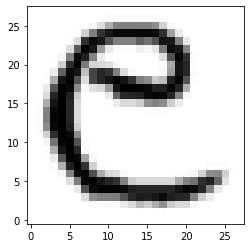

In [15]:
showImage_L(trainData_L[10])

## Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs',  max_iter=500, multi_class='auto')
clf.fit(trainData_L, trainLabels_L)

predictedTrain = [clf.predict(trainData_L)]
predictedTest = [clf.predict(testData_L)]

trainAcc = calculateLettersAccuracy(predictedTrain[0], trainLabels_L)
testAcc = calculateLettersAccuracy(predictedTest[0], testLabels_L)

In [17]:
print('train data accuracy:', trainAcc)
print('test data accuracy:', testAcc)

train data accuracy: 0.7741190987614825
test data accuracy: 0.5628


# HandWritten Digit Detection(Using Neural Network : MLP)

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


mlp = MLPClassifier(hidden_layer_sizes=(200),shuffle=True,momentum=0.9, activation='logistic', max_iter = 1000,learning_rate_init=0.001)
mlp.fit(trainData, trainLabels)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=200, learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [19]:
from sklearn.metrics import classification_report
predicted = mlp.predict(testData)
print(classification_report(testLabels,predicted))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.93      1.00      0.96        25
           2       0.96      1.00      0.98        27
           3       0.86      0.75      0.80        16
           4       0.94      0.89      0.92        19
           5       0.69      0.75      0.72        12
           6       0.96      0.86      0.91        28
           7       0.90      0.86      0.88        21
           8       0.86      0.95      0.90        19
           9       0.78      0.82      0.80        17

    accuracy                           0.89       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.89      0.89      0.89       200



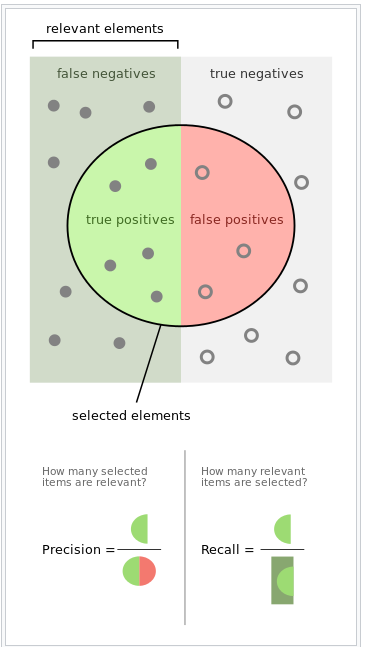

In [20]:
calculateDigitsAccuracy(predicted, testLabels)

0.89

# Digit Detection using Neural Network

In [21]:
import time

# Global Variables

training_size = 60000 
testing_size = 200

alpha = 0.01
iterations = 2000 

epochs = 15 

labels = 10

# --------------------------------------------------------

def predict(weights, testData):
    print(testing_size)
    print(len(testData))
    testData = np.hstack((np.ones((testing_size, 1)), testData))

    predicted_labels = np.dot(weights, testData.T)

    # signum activation function

    predicted_labels = signum(predicted_labels)

    predicted_labels = np.argmax(predicted_labels, axis=0)

    return predicted_labels.T

def signum(x):
    x[x > 0] = 1
    x[x <= 0] = -1

    return x

def learning(trainData, trainLabels, weights):
    epochs_values = []
    error_values = []

    for k in range(epochs):
        missclassified = 0

        for t, l in zip(trainData, trainLabels):
            h = np.dot(t, weights)

            h = signum(h)

            if h[0] != l[0]:
                missclassified += 1

            gradient = t * (h - l)

            # reshape gradient
            gradient = gradient.reshape(gradient.shape[0], -1)

            weights = weights - (gradient * alpha)

        error_values.append(missclassified / training_size)
        epochs_values.append(k)

    
    

    return weights

"""Find optimal weights for each logistic binary classifier"""

def train(trainData, trainLabels):
    # add 1's as x0

    trainData = np.hstack((np.ones((training_size, 1)), trainData))

    # add w0 as 0 initially
    all_weights = np.zeros((labels, trainData.shape[1]))

    trainLabels = trainLabels.reshape((training_size, 1))

    trainLabels_copy = np.copy(trainLabels)

    for j in range(labels):

        print("Training Classifier: ", j+1)

        trainLabels = np.copy(trainLabels_copy)

        # initialize all weights to zero
        weights = np.zeros((trainData.shape[1], 1))

        
        for k in range(training_size):
            if trainLabels[k, 0] == j:
                trainLabels[k, 0] = 1
            else:
                trainLabels[k, 0] = -1

        weights = learning(trainData, trainLabels, weights)

        all_weights[j, :] = weights.T

    return all_weights


# --------------------------------------------------------
def run(trainData, trainLabels, testData, testLabels):

    print("------------------------------------------------------------------------------------")
    print("Running Experiment using Perceptron Learning Rule for Thresholded Unit")
    print("------------------------------------------------------------------------------------")

    print("Training ...")
    start_time = time.clock()
    all_weights = train(trainData, trainLabels)
    print("Training Time: %.2f seconds" % (time.clock() - start_time))
    print("Weights Learned!")

    print("Classifying Test Images ...")
    start_time = time.clock()
    predicted_labels = predict(all_weights, testData)
    print("Prediction Time: %.2f seconds" % (time.clock() - start_time))

    print("Test Images Classified!")

    accuracy = calculateDigitsAccuracy(predicted_labels, testLabels) * 100

    print("Accuracy: %f" % accuracy, "%")
    print("---------------------\n")


# --------------------------------------------------------

def main():
    # load data
   
    trainData = []
    trainLabels = []

    train_z = pd.read_csv('./MNIST_data/mnist_train.csv', header=None).values

    for i in range(60000):
        trainData.append(train_z[i][1:785])
        trainLabels.append(train_z[i][0])



    testData = pd.read_csv('./MNIST_data/test_data.csv', header=None).values
    testLabels = pd.read_csv('./MNIST_data/test_label.csv', header=None).values

    print(len(trainData))
    trainData = np.array(trainData[0:training_size])
    trainLabels = np.array(trainLabels[0:training_size])

    testData = np.array(testData[0:testing_size])
    testLabels = np.array(testLabels[0:testing_size])

    run(trainData, trainLabels, testData, testLabels)


# --------------------------------------------------------

main()   

60000
------------------------------------------------------------------------------------
Running Experiment using Perceptron Learning Rule for Thresholded Unit
------------------------------------------------------------------------------------
Training ...
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Time: 172.99 seconds
Weights Learned!
Classifying Test Images ...
200
200
Prediction Time: 1.07 seconds
Test Images Classified!
Accuracy: 80.000000 %
---------------------



# 

In [22]:
import time

# Global Variables

training_size = 43762
testing_size = 10000

alpha = 0.01
iterations = 2000 

epochs = 15  
labels = 19

# --------------------------------------------------------

def predict(weights, testData_L):
    print(testing_size)
    print(len(testData_L))
    testData_L = np.hstack((np.ones((testing_size, 1)), testData_L))

    predicted_labels = np.dot(weights, testData_L.T)

    predicted_labels = signum(predicted_labels)

    predicted_labels = np.argmax(predicted_labels, axis=0)

    return predicted_labels.T

def signum(x):
    x[x > 0] = 1
    x[x <= 0] = -1

    return x

def learning(trainData_L, trainLabels_L, weights):
    epochs_values = []
    error_values = []

    for k in range(epochs):
        missclassified = 0

        for t, l in zip(trainData_L, trainLabels_L):
            h = np.dot(t, weights)

            h = signum(h)

            if h[0] != l[0]:
                missclassified += 1

            gradient = t * (h - l)

            # reshape gradient
            gradient = gradient.reshape(gradient.shape[0], -1)

            weights = weights - (gradient * alpha)

        error_values.append(missclassified / training_size)
        epochs_values.append(k)

    return weights

"""Find optimal weights for each logistic binary classifier"""


def train(trainData_L, trainLabels_L):
    # add 1's as x0
  
    trainData_L = np.hstack((np.ones((training_size, 1)), trainData_L))

    # add w0 as 0 initially
    all_weights = np.zeros((labels, trainData_L.shape[1]))

    trainLabels_L = trainLabels_L.reshape((training_size, 1))

    trainLabels_L_copy = np.copy(trainLabels_L)

    for j in range(labels):

        print("Training Classifier: ", j+1)

        trainLabels_L = np.copy(trainLabels_L_copy)

        # initialize all weights to zero
        weights = np.zeros((trainData_L.shape[1], 1))

        
        for k in range(training_size):
            if trainLabels_L[k, 0] == j:
                trainLabels_L[k, 0] = 1
            else:
                trainLabels_L[k, 0] = -1

        weights = learning(trainData_L, trainLabels_L, weights)

        all_weights[j, :] = weights.T

    return all_weights


# --------------------------------------------------------
def run(trainData_L, trainLabels_L, testData_L, testLabels_L):

    print("------------------------------------------------------------------------------------")
    print("Running Experiment using Perceptron Learning Rule for Thresholded Unit")
    print("------------------------------------------------------------------------------------")

    print("Training ...")
    start_time = time.clock()
    all_weights = train(trainData_L, trainLabels_L)
    print("Training Time: %.2f seconds" % (time.clock() - start_time))
    print("Weights Learned!")

    print("Classifying Test Images ...")
    start_time = time.clock()
    predicted_labels = predict(all_weights, testData_L)
    print("Prediction Time: %.2f seconds" % (time.clock() - start_time))

    print("Test Images Classified!")

    accuracy = calculateLettersAccuracy(predicted_labels, testLabels_L) * 100

    print("Accuracy: %f" % accuracy, "%")
    print("---------------------\n")


# --------------------------------------------------------

def main():
    # load data
    
    train_z = pd.read_csv('./MNIST_data/emnist-letters-train.csv', header=None).values
    test_z = pd.read_csv('./MNIST_data/emnist-letters-test.csv', header=None).values

    trainData_L = []
    testData_L = []
    trainLabels_L = []
    testLabels_L = []
    for i in range(60000):
        if(train_z[i][0] < 20):
            trainData_L.append(train_z[i][1:785])
            trainLabels_L.append(train_z[i][0])
            
    for i in range(10000):
        testData_L.append(train_z[i][1:785])
        testLabels_L.append(train_z[i][0])

    trainData_L = np.array(trainData_L[:training_size])
    trainLabels_L = np.array(trainLabels_L[:training_size])

    testData_L = np.array(testData_L[:testing_size])
    testLabels_L = np.array(testLabels_L[:testing_size])

   

    run(trainData_L, trainLabels_L, testData_L, testLabels_L)

  



# --------------------------------------------------------


main()   

------------------------------------------------------------------------------------
Running Experiment using Perceptron Learning Rule for Thresholded Unit
------------------------------------------------------------------------------------
Training ...
Training Classifier:  1
Training Classifier:  2
Training Classifier:  3
Training Classifier:  4
Training Classifier:  5
Training Classifier:  6
Training Classifier:  7
Training Classifier:  8
Training Classifier:  9
Training Classifier:  10
Training Classifier:  11
Training Classifier:  12
Training Classifier:  13
Training Classifier:  14
Training Classifier:  15
Training Classifier:  16
Training Classifier:  17
Training Classifier:  18
Training Classifier:  19
Training Time: 252.51 seconds
Weights Learned!
Classifying Test Images ...
10000
10000
Prediction Time: 0.18 seconds
Test Images Classified!
Accuracy: 31.890000 %
---------------------

